In [39]:
# Importing libraries

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Linear Regression

class LinearRegression() :
	
	def __init__( self, learning_rate, iterations ) :
		
		self.learning_rate = learning_rate
		
		self.iterations = iterations
		
	# Function for model training
			
	def fit( self, X, Y ) :
		
		# no_of_training_examples, no_of_features
		
		self.m, self.n = X.shape
		
		# weight initialization
		
		self.W = np.zeros( self.n )
		
		self.b = 0
		
		self.X = X
		
		self.Y = Y
		
		
		# gradient descent learning
				
		for i in range( self.iterations ) :
			
			self.update_weights()
			
		return self
	
	# Helper function to update weights in gradient descent
	
	def update_weights( self ) :
			
		Y_pred = self.predict( self.X )
		
		# calculate gradients
	
		dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) / self.m
	
		db = - 2 * np.sum( self.Y - Y_pred ) / self.m
		
		# update weights
	
		self.W = self.W - self.learning_rate * dW
	
		self.b = self.b - self.learning_rate * db
		
		return self
	
	# Hypothetical function h( x )
	
	def predict( self, X ) :
	
		return X.dot( self.W ) + self.b
	


In [40]:
#lets import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Data Pre - Processing

In [41]:
#loading dataset from csv file to pandas dataframe
salary_date = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\Salary_Data.csv")

In [42]:
#print the first 5 columns of dataset
salary_date.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
#print the last 5 rows of datafram
salary_date.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [44]:
#print the no. of rows and columns in dataframe
salary_date.shape

(30, 2)

In [45]:
#finding out missing values in dataset
salary_date.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Splitting the feature & target

In [46]:
X = salary_date.iloc[:,:-1].values
Y = salary_date.iloc[:,1].values

In [47]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [48]:
print(Y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


# Splitting the dataset into training and test data

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2 )

## Training Linear Regression model

In [53]:
model = LinearRegression(learning_rate = 0.02, iterations = 1000)

In [54]:
model.fit(X_train,Y_train)

## Printing the parameters value(weights & bias)

In [56]:
print('weight = ',model.W[0])
print('bias = ',model.b)

weight =  9514.400999035135
bias =  23697.406507136307


## Predict the salary value for test data

In [57]:
test_data_prediction = model.predict(X_test)

In [58]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


# Visualizing the predicted values & Actual values

<function matplotlib.pyplot.show(close=None, block=None)>

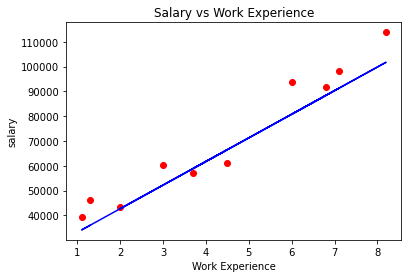

In [61]:
plt.scatter(X_test,Y_test, color='red')
plt.plot(X_test, test_data_prediction, color ='blue')
plt.xlabel('Work Experience')
plt.ylabel('salary')
plt.title('Salary vs Work Experience')
plt.show